<a href="https://colab.research.google.com/github/AhmadAghaebrahimian/Optimization/blob/main/GradientDescent/GD_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generating a simple dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # One feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Adding noise to linear relationship


In [ ]:
# Function to compute gradients and MSE for Gradient Descent
def gradient_descent(X, y, learning_rate, n_iterations):
    m = len(y)
    theta = np.random.randn(1, 1)  # Random initialization of theta (including bias)
    cost_history = []

    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost = np.mean((X.dot(theta) - y)**2)
        cost_history.append(cost)

    return theta, cost_history

In [ ]:
# Applying Gradient Descent
learning_rate = 0.5 # too small and too big lr
n_iterations = 5

theta_best, cost_history = gradient_descent(X, y, learning_rate, n_iterations)


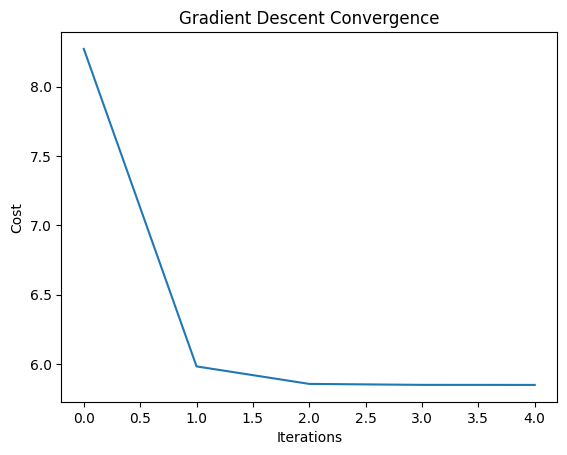

Theta found by Gradient Descent: [5.98452865]


In [ ]:
# Plotting the convergence of the cost function
plt.plot(range(n_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence')
plt.show()
#
print("Theta found by Gradient Descent:", theta_best.ravel())